In [1]:
# Discription: This is for practice of Machine Learning module in LACC 2019
# In this mini-project, you will load the MNIST dataset images and use SVM and CNN 
# for hand-written digitsclassification

In [2]:
from PIL import Image
import numpy as np
import os
from keras import utils

Using TensorFlow backend.


In [3]:
def load_data():
    # read all images in MNIST, shape the data and save as "data"/"label"
    data = np.empty((42000,28,28,1),dtype="float32")
    label = np.empty((42000,),dtype="uint8")
    imgs = os.listdir("./mnist")
    
    num = len(imgs)
    for i in range(num):
        img = Image.open("./mnist/"+imgs[i])
        arr = np.asarray(img,dtype="float32")
        data[i,:,:,0] = arr
        label[i] = int(imgs[i].split('.')[0])
        
    data /= np.max(data)
    data -= np.mean(data)
    return data,label

In [4]:
data,label = load_data()
print(data.shape)
# data = data.reshape(len(data), 28*28, 1, 1)
# data = np.squeeze(data)
# print(data.shape)

(42000, 28, 28, 1)


In [5]:
# Randomly shuffle the original dataset and then split it into training set and testing set.
from sklearn.model_selection import train_test_split
nb_class = 10
label = utils.to_categorical(label, nb_class)
X_train, X_test, y_train, y_test = train_test_split(data, label, test_size=10000, random_state=42)

In [6]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(32000, 28, 28, 1)
(32000, 10)
(10000, 28, 28, 1)
(10000, 10)


In [7]:
from keras.models import Sequential 
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization, ReLU
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping
# Creating a Sequential Model and adding the layers 
def create_model():
    model = Sequential() 
    model.add(Conv2D(8, kernel_size=(5,5), input_shape=(28,28,1))) 
    model.add(BatchNormalization())
    model.add(Dropout(0.2)) 
    model.add(ReLU())
    model.add(Conv2D(8, kernel_size=(3,3))) 
    model.add(BatchNormalization())
    model.add(Dropout(0.2)) 
    model.add(ReLU())
    model.add(MaxPooling2D(pool_size=(2,2))) 
    model.add(Conv2D(16, kernel_size=(3,3))) 
    model.add(BatchNormalization())
    model.add(Dropout(0.2)) 
    model.add(ReLU())
    model.add(Conv2D(16, kernel_size=(3,3))) 
    model.add(BatchNormalization())
    model.add(Dropout(0.2)) 
    model.add(ReLU())
    model.add(Flatten()) # Flattening the 2D arrays for fully connected layers 
    model.add(Dense(128)) 
    model.add(BatchNormalization())
    model.add(Dropout(0.2)) 
    model.add(ReLU())
    model.add(Dense(nb_class, activation='softmax'))
    return model

In [8]:
model = create_model()
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
model.compile(loss='categorical_crossentropy', optimizer=adam)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [9]:
import pickle
early_stopping = EarlyStopping(monitor='val_loss', patience=3)
model.fit(X_train, y_train, batch_size=64, validation_data=(X_test, y_test),
          epochs=10, callbacks=[early_stopping])
pickle.dump(model, open("./model.pkl", "wb"))

Instructions for updating:
Use tf.cast instead.
Train on 32000 samples, validate on 10000 samples
Epoch 1/10
32000/32000 [==============================] - 41s 1ms/step - loss: 0.3914 - val_loss: 0.1703
Epoch 2/10
32000/32000 [==============================] - 36s 1ms/step - loss: 0.1210 - val_loss: 0.0973
Epoch 3/10
32000/32000 [==============================] - 37s 1ms/step - loss: 0.0857 - val_loss: 0.0894
Epoch 4/10
32000/32000 [==============================] - 38s 1ms/step - loss: 0.0754 - val_loss: 0.0856
Epoch 5/10
32000/32000 [==============================] - 40s 1ms/step - loss: 0.0632 - val_loss: 0.0607
Epoch 6/10
32000/32000 [==============================] - 36s 1ms/step - loss: 0.0584 - val_loss: 0.0515
Epoch 7/10
32000/32000 [==============================] - 37s 1ms/step - loss: 0.0534 - val_loss: 0.0674
Epoch 8/10
32000/32000 [==============================] - 37s 1ms/step - loss: 0.0478 - val_loss: 0.0567
Epoch 9/10
32000/32000 [==============================] - 37s 

In [14]:
predicted_label = model.predict_classes(X_test)

In [15]:
import matplotlib.pyplot as plt
import itertools
def plot_confusion_matrix(cm, classes, normalize=False,
                          title='Confusion matrix', cmap=plt.cm.Blues):
    # This function prints and plots the confusion matrix.
    # Normalization can be applied by setting `normalize=True`.
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        # print("Normalized confusion matrix")
    else:
        # print('Confusion matrix, without normalization')
        pass
    # print(cm)
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [ ]:
y_test = np.nonzero(y_test)[1]

Accuracy score for one vs. one is : 0.98
Recall score for one vs. one is : 0.98
Precision score for one vs. one is : 0.9805497181194159
F1 score for one vs. one is : 0.9799733870960523


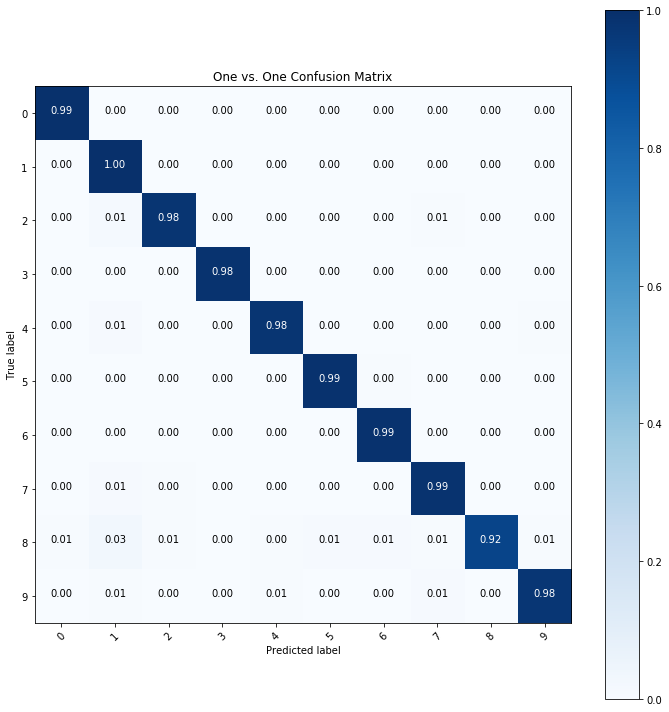

In [18]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

accuracy = accuracy_score(y_test, predicted_label)
recall = recall_score(y_test, predicted_label, average = 'weighted')
precision = precision_score(y_test, predicted_label, average = 'weighted')
f1 = f1_score(y_test, predicted_label, average = 'weighted')

print("Accuracy score for one vs. one is : {}".format(accuracy))
print("Recall score for one vs. one is : {}".format(recall))
print("Precision score for one vs. one is : {}".format(precision))
print("F1 score for one vs. one is : {}".format(f1))
cnf_matrix = confusion_matrix(y_test, predicted_label)
plot_confusion_matrix(cnf_matrix, classes=list(np.arange(0,10)),
                      normalize=True, title='One vs. One Confusion Matrix')